In [5]:
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Concatenate, BatchNormalization, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras import Input
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
import numpy as np

In [6]:
from tensorflow.keras.utils import to_categorical
num_classes = 15

In [7]:
import cv2
import matplotlib.pyplot as plt
imgDir = './data/'
img_list = []
img_labels = []
for i in range(1, 166):
    fileName = 's' + str(i) + '.bmp'
    img = cv2.imread(imgDir + fileName)
    img_list.append(img)
    img_labels.append((i - 1) // 11)

img_list = np.array(img_list)/255.0
img_labels = np.array(img_labels)
# plt.imshow(img_list[0])

# convert class vectors to binary class matrices.
img_labels = to_categorical(img_labels, num_classes)

In [8]:
index = [_ for _ in range(len(img_list))]
np.random.shuffle(index)
 
img_list=img_list[index]
img_labels=img_labels[index]

In [9]:
def LeNet(input_shape = (100,100,3)):
    
    concat_axis = 1 if K.image_data_format() == 'channels_first' else -1
    
    x = Conv2D(6, (3,3), kernel_initializer='he_normal', padding='valid', strides=1)(input_shape)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2,2), strides=2, padding='valid')(x)
    
    x = Conv2D(10, (3,3), kernel_initializer='he_normal', padding='valid', strides=1)(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2,2), strides=2, padding='valid')(x)
    
    x = Conv2D(32, (3,3), kernel_initializer='he_normal', padding='valid', strides=1)(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2,2), strides=2, padding='valid')(x)
    
    
    x = Flatten()(x)
    
    x = Dense(1024, kernel_initializer='he_normal', activation='relu')(x)
    x = Dense(512, kernel_initializer='he_normal', activation='relu')(x)
    x = Dense(num_classes, kernel_initializer='he_normal', activation='softmax')(x)
    
    return x

In [11]:
# base_model = ResNet50(weights='imagenet', include_top=False, input_shape=img_list[0].shape)
# # 添加全局平均池化层
# x = base_model.output
# x = GlobalAveragePooling2D()(x)

# # 添加一个全连接层
# x = Dense(1024, activation='relu')(x)
# # 添加一个分类器，假设我们有200个类
# predictions = Dense(num_classes, activation='softmax')(x)
# # 构建我们需要训练的完整模型
# model = Model(inputs=base_model.input, outputs=predictions)


In [12]:
inputs = Input(img_list[0].shape)
outputs = LeNet(inputs)
model = Model(inputs, outputs, name="LeNet")

In [13]:
# model.summary()

In [14]:
# 编译模型（一定要在锁层以后操作）
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(img_list, img_labels, validation_split=0.35, batch_size=8, epochs=20)

Epoch 1/20
14/14 [==============================] - 1s 60ms/step - loss: 2.7812 - accuracy: 0.1215 - val_loss: 2.6559 - val_accuracy: 0.0517
Epoch 2/20
14/14 [==============================] - 1s 44ms/step - loss: 2.1846 - accuracy: 0.3645 - val_loss: 2.3419 - val_accuracy: 0.3448
Epoch 3/20
14/14 [==============================] - 1s 43ms/step - loss: 1.8635 - accuracy: 0.4393 - val_loss: 2.0644 - val_accuracy: 0.5000
Epoch 4/20
14/14 [==============================] - 1s 43ms/step - loss: 1.5925 - accuracy: 0.6449 - val_loss: 1.8349 - val_accuracy: 0.6034
Epoch 5/20
14/14 [==============================] - 1s 43ms/step - loss: 1.3491 - accuracy: 0.6916 - val_loss: 1.6776 - val_accuracy: 0.5690
Epoch 6/20
14/14 [==============================] - 1s 43ms/step - loss: 1.1443 - accuracy: 0.7850 - val_loss: 1.5243 - val_accuracy: 0.6379
Epoch 7/20
14/14 [==============================] - 1s 43ms/step - loss: 0.8714 - accuracy: 0.8598 - val_loss: 1.3344 - val_accuracy: 0.6724
Epoch 8/20
14

In [16]:
import matplotlib.pyplot as plt
def display_training_curves(training, validation, title, subplot):
    ax = plt.subplot(subplot)
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['training', 'validation'])

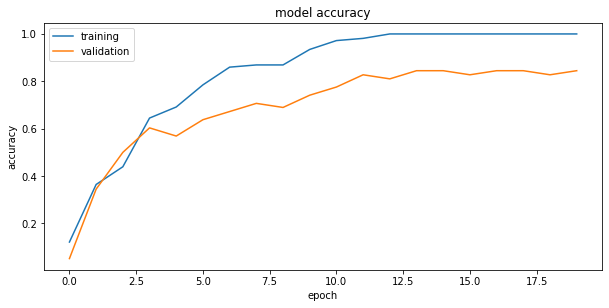

In [20]:
plt.subplots(figsize=(10,10))
display_training_curves(history.history["accuracy"], history.history["val_accuracy"], 'accuracy', 211)